# DSCI 631 Final Project - Credit Card Fraud Detection
## Fall 2022
## Dr. Lei Wang


Group 05:
>>
  Tien Nguyen 
  >>
  Luqing Qi 
  >>
  Will Wu

##Introduction
  Credit card fraud is one of the most common forms of virtual identity theft. It involves the unauthorized use of someone's credit card information to make purchases or transactions that are against the user's will. In our project, we hope to analyze our dataset and apply different machine learning algorithms in hopes to track patterns to predict and prevent abnormal credit card transactions. 

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Dataset Description:**
Our dataset contains only numerical input variables which were the result of a PCA transformation (not done by us). Original features and more background information cannot be provided due to confidentiality issues. We have a total of 31 columns/features, features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. There are a total of 284807 rows with no null values. 

**Sources:**
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#notebook-container

##EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv('creditcard.csv')
df = pd.read_csv('drive/MyDrive/MSDS_Drexel/DSCI631/Project/Project/creditcard.csv') # Tien 
# df = pd.read_csv('/content/drive/MyDrive/Data/creditcard.csv') 

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data type of each variable in the dataset
 Observation: The dataset has a total of 31 columns with the label column at the end. All column from index 0 to 30 has float64 data type. The label column, index 31, has int datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### The dataset does not have any null values

In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Visualize the distribution of the the target 'Class' vs the distribution of each predictor
Observations: 
- These atributes have different scales. 
- Most attributes have right or left skewed. Only a few attributes have bell-shaped distribution including V9, V10, V13, V16, V19, V21, V22


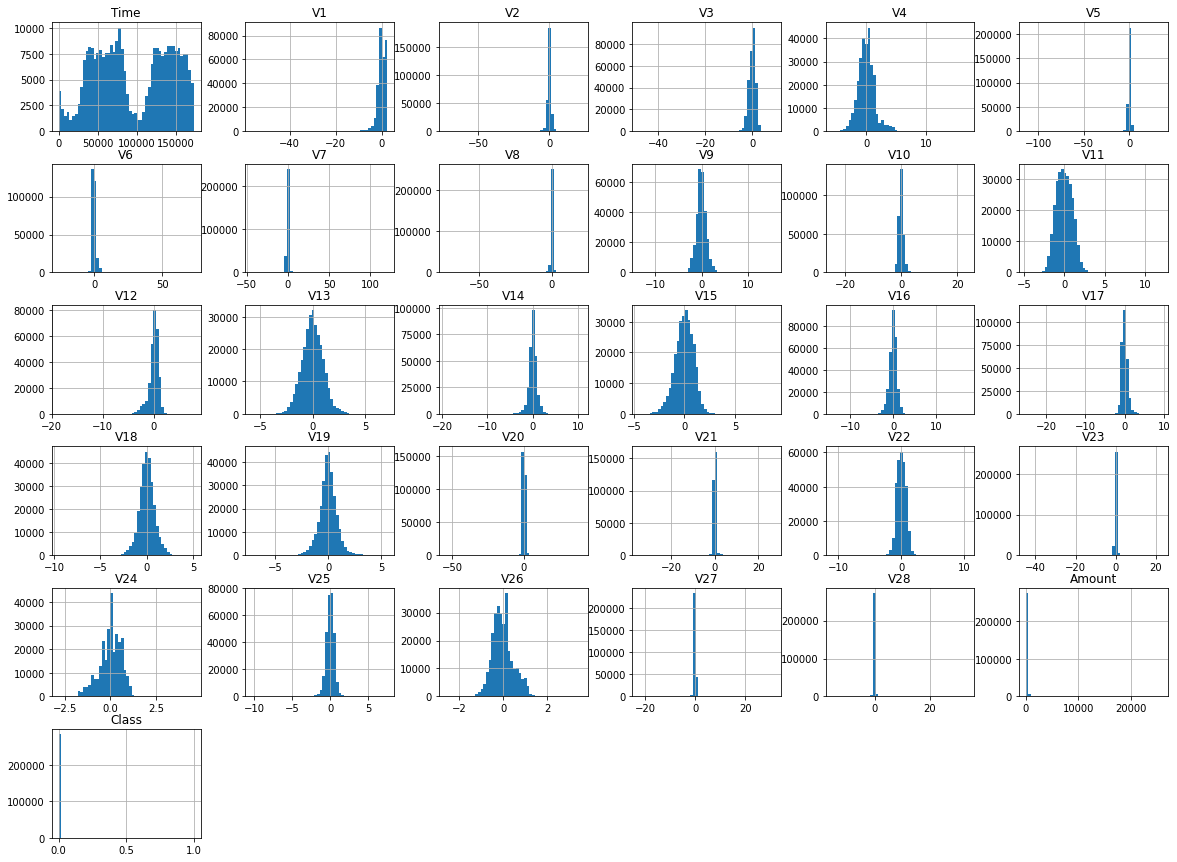

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times for Normal users ')

<Figure size 576x288 with 0 Axes>

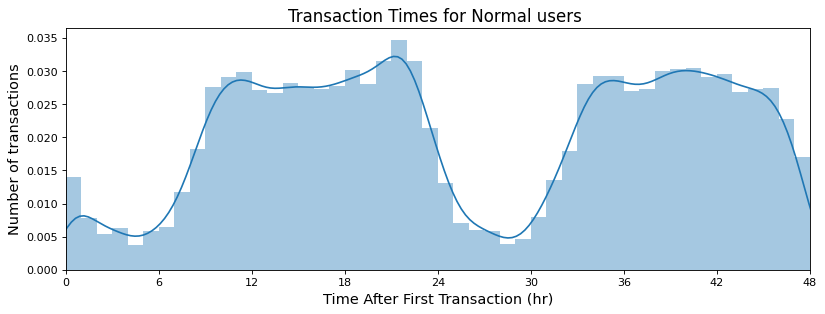

In [ ]:
import seaborn as sns 
import numpy as np 
plt.figure(figsize=(8,4))
Nofraud_data = df [df['Class']==0]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data [ 'Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for Normal users ',fontsize=15)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times for fruad users ')

<Figure size 576x288 with 0 Axes>

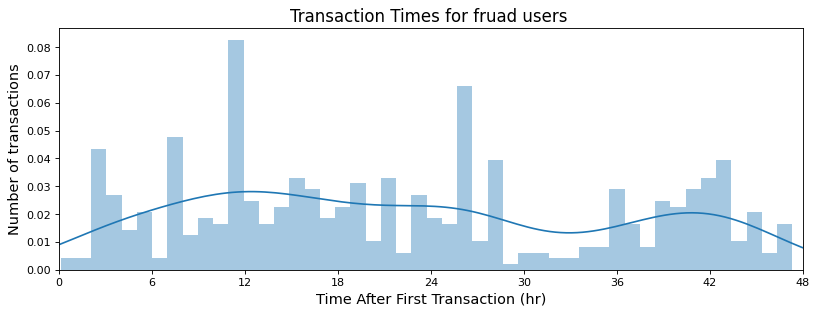

In [ ]:
import seaborn as sns 
import numpy as np 
plt.figure(figsize=(8,4))
Nofraud_data = df [df['Class']==1]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data [ 'Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for fruad users ',fontsize=15)

### The above graph compares the transaction times for fraud and normal users. We found out that fruad users like to use it late at night.

### Correlation Matrix 
We using correlation matrix to find out relationships between the variables 

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

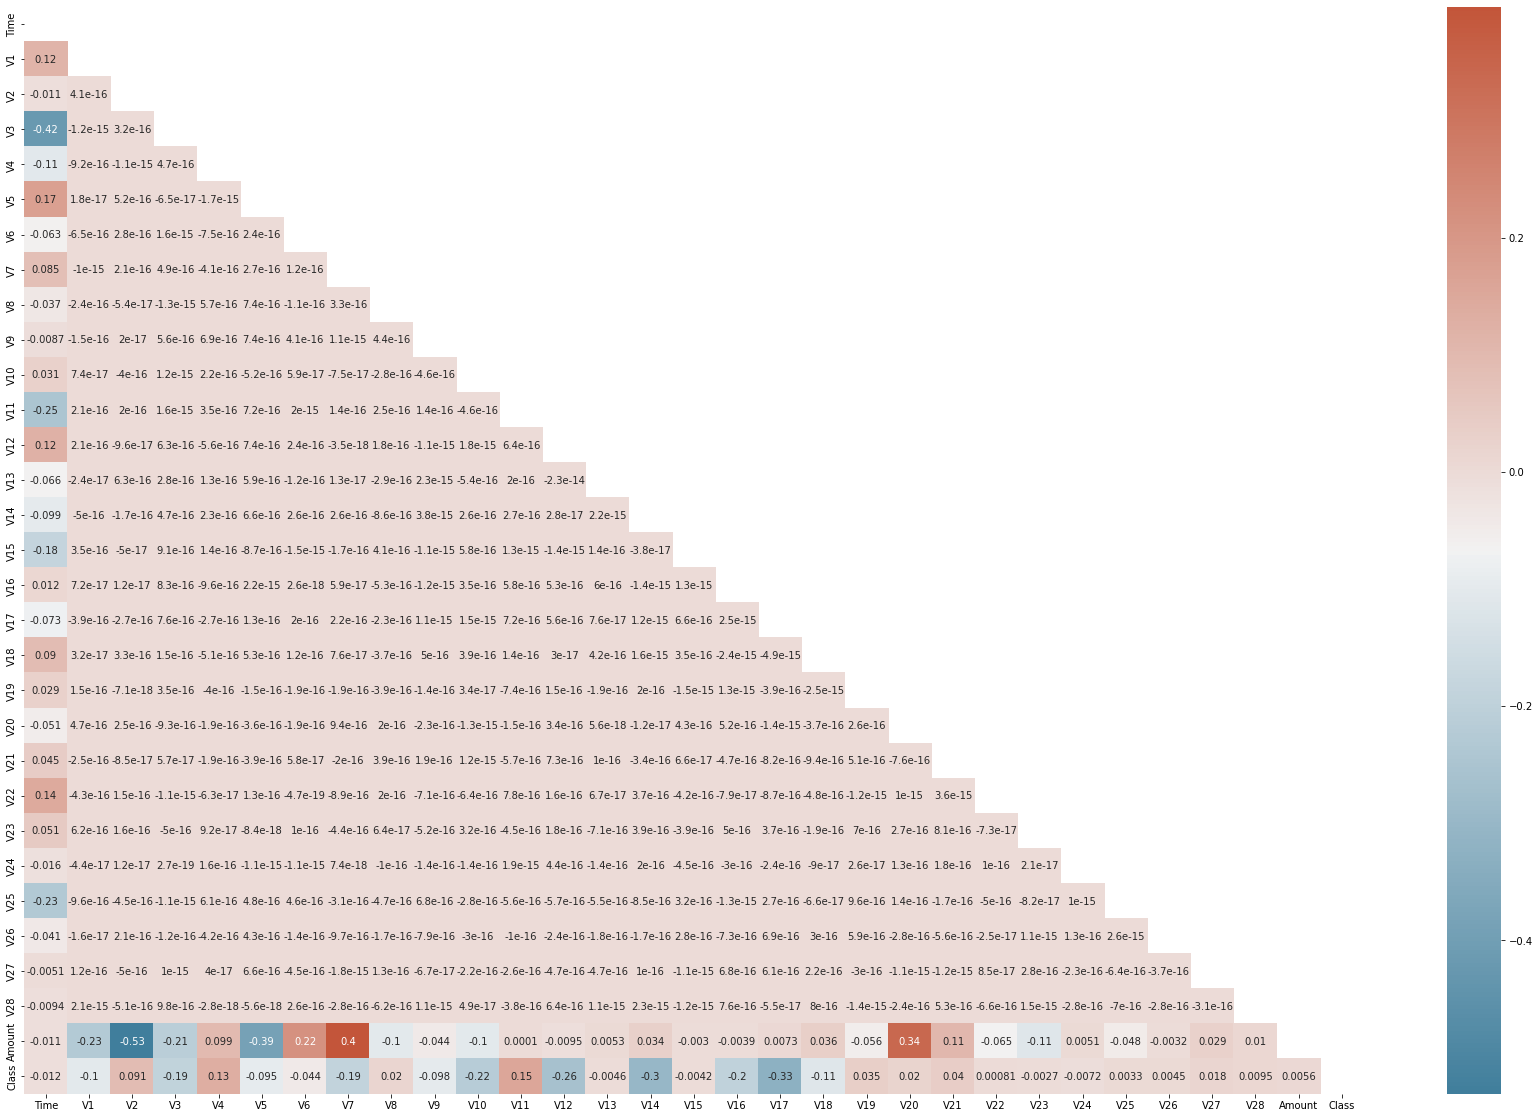

In [ ]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(30, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


### The Variable Highly influence the Class Variable
From the correlation matrix we can see that 
V12 V14 V17 are three important factors influence the Class.

In this step, the problems I faced were: First, some of our variables were highly correlated, and I used the Variance Inflection factor(VIF) to identify and remove these variables.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_before = df
df_after = df.drop(['Amount'], axis=1)



X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)


series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)


print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const     10.068147
Time       1.879918
V1         1.669207
V2         4.449598
V3         1.949665
V4         1.172672
V5         2.871870
V6         1.577457
V7         3.015964
V8         1.132849
V9         1.043109
V10        1.220611
V11        1.164665
V12        1.170906
V13        1.008529
V14        1.225672
V15        1.063474
V16        1.081010
V17        1.234457
V18        1.057536
V19        1.042558
V20        2.399238
V21        1.143026
V22        1.089140
V23        1.158154
V24        1.000924
V25        1.130838
V26        1.003399
V27        1.010661
V28        1.001605
Amount    12.120566
Class      2.090472
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const    8.498833
Time     1.879773
V1       1.047114
V2       1.017606
V3       1.410552
V4       1.057739
V5       1.074801
V6       1.011505
V7       1.086426
V8       1.003376
V9       1.020120
V10      1.099919
V11      1.164621
V12      1.170281
V13      1.008214
V14      1.210265
V15      1.063318
V16      1.080940
V17      1.233369
V18      1.041131
V19      1.004128
V20      1.005685
V21      1.007214
V22      1.039015
V23      1.004929
V24      1.000604
V25      1.102130
V26      1.003260
V27      1.000693
V28      1.000355
Class    2.089805
dtype: float64

### Check variables skew and kurtois

In [ ]:
df_after.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Time,-0.035568,-1.293530
V1,-3.280667,32.486679
V2,-4.624866,95.773106
V3,-2.240155,26.619551
V4,0.676292,2.635455
V5,-2.425901,206.904560
V6,1.826581,42.642494
V7,2.553907,405.607417
V8,-8.521944,220.586974
V9,0.554680,3.731311


### From result we can found out that 
In statistics, skewness is a degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution (bell
curve) in a given set of data.

V1,V2,V3,V5,V6,V7,V8,V10,V12,V14,V16,V17,V20,V21,V23,V24,V27,V28 are extremely skewed

Kurtosis refers to the degree of presence of outliers in the distribution.

Kurtosis is a statistical measure, whether the data is heavy-tailed or light-tailed in a normal distribution.

V28,V27,V25,V23,V21,V20,V17,V16,V14,V12,V10,V8,V7,V6,V5,V3,V2,V1 these variables have extreme positive kurtosis indicates a distribution where more of the numbers are located in the tails of the distribution instead of around the mean.


##Data Preprocessing

### Imbalanced Data

0    284315
1       492
Name: Class, dtype: int64


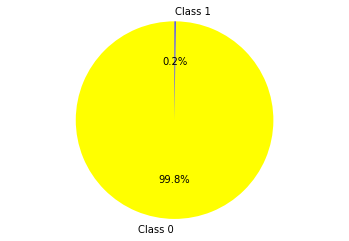

In [ ]:
value_counts = df['Class'].value_counts()
print(value_counts)
plt.pie([value_counts[0], value_counts[1]],labels=['Class 0', 'Class 1'], colors=['yellow', 'blue'], startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

As we can see the data is heavily imbalanced, with only 492 of class 1 which is about 0.2% and 284315 of class 1 which is 99.8%. Before dealing with the imbalanced data, we will need to split the original data so we can test our models on the orginal test data not on the balanced data after we apply our strategy. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


#### Apply SMOTE to train dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
np.bincount(y_train_smote)

array([227451, 227451])

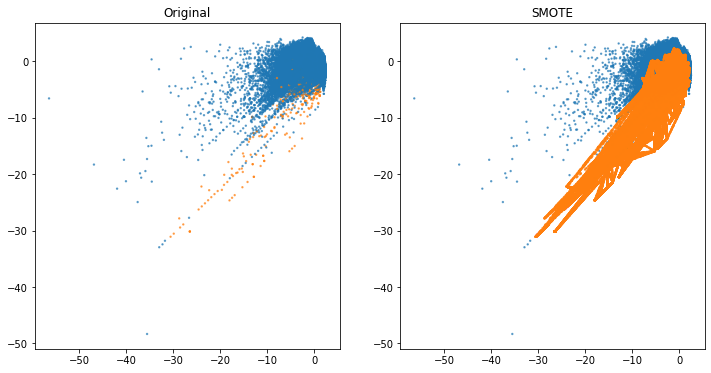

In [ ]:
feat1 = 'V1'
feat2 = 'V3'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sorting = np.argsort(y_train)
axes[0].scatter(X_train[feat1], X_train[feat2], c=plt.cm.tab10(y_train), alpha=.6, s=2)
axes[1].scatter(X_train_smote[feat1], X_train_smote[feat2], c=plt.cm.tab10(y_train_smote), alpha=.6, s=2)
axes[0].set_title("Original")
axes[1].set_title("SMOTE")
plt.show()

### Baseline model: Dummy Classifier

In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
def get_metrics(y_true, y_pred, dataset):
    print(dataset)
    print('Precision: %.3f' % precision_score(y_true, y_pred))
    print('Recall: %.3f' % recall_score(y_true, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))

    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    

In [ ]:
scaler = StandardScaler()

X_prepared_train = scaler.fit_transform(X_train_smote)
X_prepared_test = scaler.transform(X_test)

------------------------- Dummy Classifier ----------------------

Training
Precision: 0.502
Recall: 0.502
Accuracy: 0.502


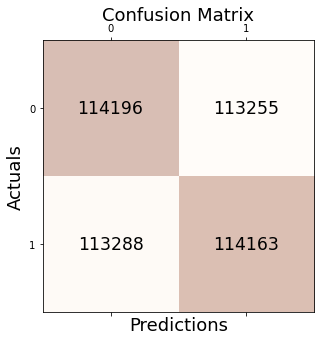

Testing
Precision: 0.001
Recall: 0.418
Accuracy: 0.500


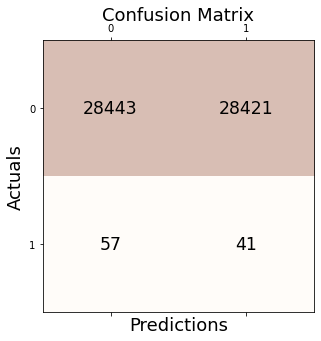

In [ ]:

clf_dummy_sm = DummyClassifier(strategy="uniform")

clf_dummy_sm.fit(X_prepared_train, y_train_smote)

y_pred_test = clf_dummy_sm.predict(X_prepared_test)

y_pred_train = clf_dummy_sm.predict(X_prepared_train)

print('------------------------- Dummy Classifier ----------------------')
print()
get_metrics(y_train_smote, y_pred_train, 'Training')
get_metrics(y_test, y_pred_test, 'Testing')


To be able to understand and then improve our model’s performance, we first need to establish a baseline for the data that we have. We implemented Dummy Classifier model as our baseline model. Dummy classifier is a classifier model that makes predictions without trying to find patterns in the data. In this project, we set the strategy for dummy classifier as “uniform,” which would generates predictions uniformly at random from the list of unique classes observed. In other words, each class has equal probability, just like flipping a coin.


The metrics that we use to evaluate the model performance are recall, precision, accuracy, and confusion matrix for visualization. Recall is the most important metric in this project because we want to detect as many fraud transaction as possible.

For Dummy classifier, both the testing and training dataset have around 50% accuracy and recall. With 50% recall, it means that the model can only detect 50% of the fraud transaction, which is very low. We will move to the next model to see if it performs better.


### Model 1: Logistic Regression with SMOTE and Cross Validation

In [ ]:
from imblearn.pipeline import Pipeline as Pipeline_imb

score_focus = 'recall'

pipe_lr = Pipeline_imb(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('logisticregression', LogisticRegression(random_state=42, max_iter=1000))])

kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_lr = cross_val_score(pipe_lr, X_train, y_train, scoring='recall', cv=kf)

print('Logistic Regression(SMOTE)')
print('Average Recall: %.2f' % (scores_lr.mean()))

Logistic Regression(SMOTE)
Average Recall: 0.88


### Perform GridsearchCV to find the best parameters
The training process for this GridsearchCV can take up to 45 minutes

In [ ]:


parameters_lr = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['liblinear'],
}

lr = LogisticRegression(random_state=42, max_iter=1000)

clf_lr = GridSearchCV(lr,                    
                   param_grid = parameters_lr,   
                   scoring='recall',        
                   cv=5)  
clf_lr.fit(X_prepared_train, y_train_smote)

KeyboardInterrupt: ignored

In [ ]:
clf_lr.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
cvres = clf_lr.cv_results_
grid_lr_df = pd.DataFrame({
    "Test_Recall": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()

grid_lr_df

,Test_Recall,Parameter_Set
0,0.942827,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli..."
1,0.937169,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli..."
2,0.960739,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin..."
3,0.954162,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin..."
4,0.966059,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline..."
5,0.963394,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."
6,0.967206,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline..."
7,0.966969,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline..."
8,0.967140,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin..."
9,0.967738,"{'C': 10.0, 'penalty': 'l2', 'solver': 'liblin..."


In [ ]:
clf_lr.best_estimator_

LogisticRegression(C=1000.0, max_iter=1000, random_state=42, solver='liblinear')

-------------------- Logistic Regression ------------------
Training
Precision: 0.161
Recall: 0.896
Accuracy: 0.992


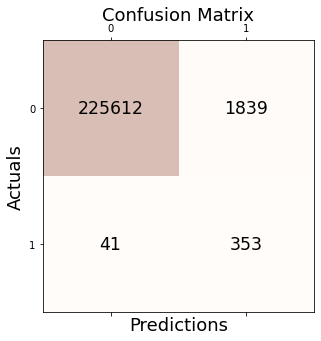

Testing
Precision: 0.161
Recall: 0.918
Accuracy: 0.992


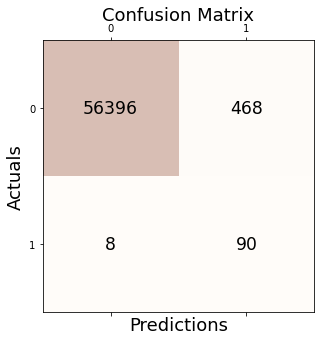

In [ ]:
final_lr = clf_lr.best_estimator_


pipe_lr = Pipeline_imb(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('logisticregression', final_lr)])
pipe_lr.fit(X_train, y_train)
y_pred_train_lr = pipe_lr.predict(X_train)
y_pred_test_lr = pipe_lr.predict(X_test)

print('-------------------- Logistic Regression ------------------')
get_metrics(y_train, y_pred_train_lr, 'Training')
get_metrics(y_test, y_pred_test_lr, 'Testing')

Comment: Logistic Regression performed much better than the Dummy Classifier. For recall, we got 89.6% for training, and 91.8% for testing. That means 91.8% of the fraud transaction was detected by the model. Precision here is also higher than dummy classifier, but still low with 16%. This means out of the transactions that was classified as fraud, only 16% of them is actual fraud. We hope to improve the precision, so we implemented another model called Random Forest.

### Random Forest

In [ ]:
from imblearn.pipeline import Pipeline as Pipeline_imb

score_focus = 'recall'

pipe_rf = Pipeline_imb(steps =[('smote', SMOTE(random_state = 42)),
                                ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0))])

kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_rf = cross_val_score(pipe_lr, X_train, y_train, scoring='recall', cv=kf)

print('Random Forest (SMOTE)')
print('Average Recall: %.2f' % (scores_rf.mean()))

Random Forest (SMOTE)
Average Recall: 0.85


In [ ]:
parameters_rdf = { 
    'n_estimators': [5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

rdf=RandomForestClassifier(random_state=42)

clf_rdf = GridSearchCV(rdf,                    
                   param_grid = parameters_rdf,   
                   scoring='recall',        
                   cv=2)  
clf_rdf.fit(X_prepared_train, y_train_smote)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10]},
             scoring='recall')

In [ ]:
clf_rdf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 10}

In [ ]:
cvres_rdf = clf_rdf.cv_results_
grid_rdf_df = pd.DataFrame({
    "Test_Recall": cvres_rdf["mean_test_score"],
    "Parameter_Set": cvres_rdf["params"],
}).sort_index()

grid_rdf_df

,Test_Recall,Parameter_Set
0,0.939627,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
1,0.939394,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
2,0.939627,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
3,0.939394,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
4,0.933709,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
5,0.937213,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
6,0.953419,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
7,0.956105,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
8,0.953419,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
9,0.956105,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."


In [ ]:
clf_rdf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=10,
                       random_state=42)

-------------------- Random Forest ------------------
Training
Precision: 0.419
Recall: 0.914
Accuracy: 0.998


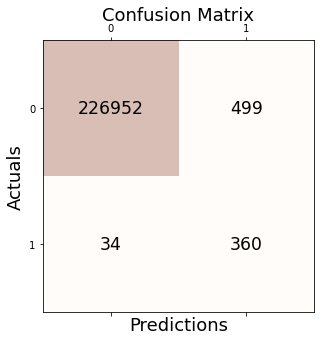

Testing
Precision: 0.398
Recall: 0.898
Accuracy: 0.997


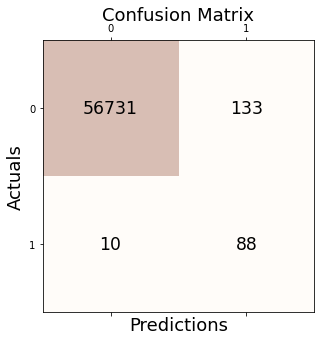

In [ ]:
final_rdf = clf_rdf.best_estimator_


pipe_rdf = Pipeline_imb(steps = [('smote', SMOTE(random_state = 42)),
                      ('logisticregression', final_rdf)])
pipe_rdf.fit(X_train, y_train)
y_pred_train_rdf = pipe_rdf.predict(X_train)
y_pred_test_rdf = pipe_rdf.predict(X_test)

print('-------------------- Random Forest ------------------')
get_metrics(y_train, y_pred_train_rdf, 'Training')
get_metrics(y_test, y_pred_test_rdf, 'Testing')

Random Forest is an ensemble learning method that has multiple decision trees. There are several parameters in Random fForest classifier that we can tune such as the number of random trees, the max depth, max features in each tree. 

Similar to Logistic Regression, we built a pipeline which includes SMOTE to balance the dataset, and the model itself. We also used Gridsearch CV to tune the parameters, and the best estimator has entropy as criterion, max depth of 8, max features is auto, and number of estimators or number of trees is 10.

The recall is very close to what we got in Logistic Regression, which is 90% of the fraud transaction was detected. Moreover, we got about 40% precision in Random Forest. This means out of the transactions that was classified as fraud, 40% of them is actual fraud. Comparing 16% precision precision from Logistic Regression, this is a big improvement.

### Gaussian Naive Bayes

In [ ]:
from imblearn.pipeline import Pipeline as Pipeline_imb

score_focus = 'recall'

pipe_nb = Pipeline_imb(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('NaiveBayes', GaussianNB())])

kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_nb = cross_val_score(pipe_nb, X_train, y_train, scoring='recall', cv=kf)

print('Gaussian Naive Bayes(SMOTE)')
print('Average Recall: %.2f' % (scores_nb.mean()))
scores_nb

Gaussian Naive Bayes(SMOTE)
Average Recall: 0.85


array([0.859375  , 0.79310345, 0.85714286, 0.87777778, 0.87951807])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

parameters_nb = { 
    'priors': [None, [0.1,]* 2,],
    'var_smoothing': [1e-9, 1e-6, 1e-12]
}

nb=GaussianNB()

clf_nb = GridSearchCV(nb,                    
                   param_grid = parameters_nb,   
                   scoring='recall',        
                   cv=5)  
clf_nb.fit(X_prepared_train, y_train_smote)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.1, 0.1]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             scoring='recall')

In [ ]:
clf_nb.best_params_

{'priors': None, 'var_smoothing': 1e-09}

-------------------- Naive Bayes ------------------
Training
Precision: 0.062
Recall: 0.853
Accuracy: 0.977


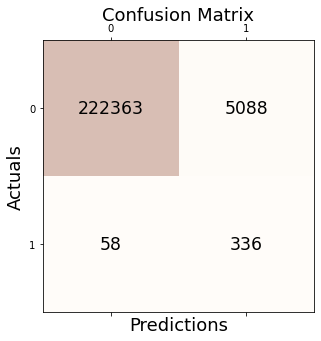

Testing
Precision: 0.061
Recall: 0.867
Accuracy: 0.977


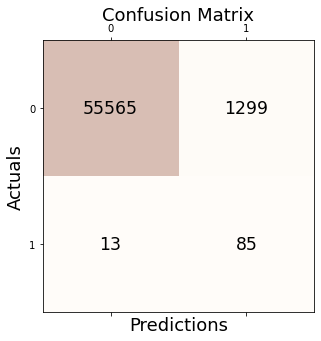

In [ ]:
final_nb = clf_nb.best_estimator_


pipe_nb = Pipeline_imb(steps = [('smote', SMOTE(random_state = 42)),
                                ('standardscaler', StandardScaler()),
                                ('Naive Bayes', final_nb)])
pipe_nb.fit(X_train, y_train)
y_pred_train_nb = pipe_nb.predict(X_train)
y_pred_test_nb = pipe_nb.predict(X_test)

print('-------------------- Naive Bayes ------------------')
get_metrics(y_train, y_pred_train_nb, 'Training')
get_metrics(y_test, y_pred_test_nb, 'Testing')

Comment: Recall for training and testing, which is about 86%, is slightly lower than the logistic Regression and Random Forest. However, precision is much lower comparing to the previous models. Precision is only 6% for this model.


### Models Comparisons

| Model | Train Recall | Train Precision | Train Accuracy | Test Recall | Test Precision | Test Accuracy |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Dummy Classifier | 0.499 | 0.499 | 0.499 | 0.500 | 0.002 | 0.502 |
| Logistic Regression | 0.896 | 0.161 | 0.992 | 0.918 | 0.161 | 0.992 |
| Random Forest | 0.914 | 0.419 | 0.998 | 0.898 | 0.398 | 0.997 |
| Naive Bayes | 0.853 | 0.062 | 0.977 | 0.867 | 0.061 | 0.977 |

To compare the models performances, we generated this table that has the training's and testing's recall, precision, and accuracy of all 4 models. From this table, we see that Logistic Regression has the highest test recall at 0.918. Random Forest comes second with only slightly lower recall at 0.898. However, Random Forest has the highest precision with about 0.40. That means, Random Forest can detect 90% the fraud transactions, and out of that 90%, 40% of them is actual fraud. We think this result is really impressive comparing to the other models that was investigated. Thus, Random Forest has the highest performance to detect the fraud transaction in our project.

### Regression using Neural Networks 

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X = df.drop('Amount', axis=1)
Y = df['Amount']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=30, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics =['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_full, y_train_full, validation_data=(X_valid, y_valid), epochs = 200)

Epoch 1/200
7121/7121 [==============================] - 18s 3ms/step - loss: 14051.1514 - mae: 56.0238 - val_loss: 11819.4375 - val_mae: 70.9152
Epoch 2/200
7121/7121 [==============================] - 19s 3ms/step - loss: 12343.4385 - mae: 50.9650 - val_loss: 14083.1758 - val_mae: 55.7491
Epoch 3/200
7121/7121 [==============================] - 19s 3ms/step - loss: 13365.5332 - mae: 51.6764 - val_loss: 25461.2891 - val_mae: 77.8450
Epoch 4/200
7121/7121 [==============================] - 18s 3ms/step - loss: 10242.1592 - mae: 46.4654 - val_loss: 6924.8677 - val_mae: 42.6842
Epoch 5/200
7121/7121 [==============================] - 19s 3ms/step - loss: 8887.5293 - mae: 44.8966 - val_loss: 4578.2729 - val_mae: 34.0130
Epoch 6/200
7121/7121 [==============================] - 19s 3ms/step - loss: 11032.4590 - mae: 47.4069 - val_loss: 4499.7700 - val_mae: 35.9218
Epoch 7/200
7121/7121 [==============================] - 22s 3ms/step - loss: 8995.2793 - mae: 44.0377 - val_loss: 5214.0254 - v

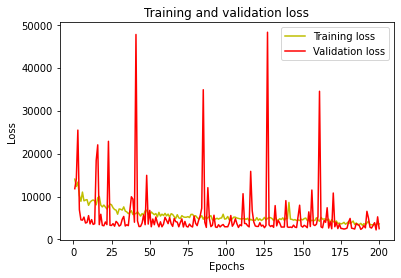

In [ ]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title ('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Predict on test data
predictions = model.predict(X_test[:5])
print('Predicted values are:' , predictions)
print("Real values are:", y_test[:5])

1/1 [==============================] - 0s 370ms/step
Predicted values are: [[199.57654 ]
 [436.64642 ]
 [ 37.17698 ]
 [ 36.09446 ]
 [ 21.211908]]
Real values are: 43428     364.19
49906     520.12
29474      31.00
276481      1.50
278846      0.89
Name: Amount, dtype: float64


## Compare with Linear Regression 

In [ ]:
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net:', mse_neural)
print('Mean absolute error from neural net:', mae_neural)

1781/1781 [==============================] - 6s 3ms/step - loss: 5304.1738 - mae: 38.1534
Mean squared error from neural net: 5304.173828125
Mean absolute error from neural net: 38.15343475341797


# Linear regression

In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_full, y_train_full)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression:', mse_lr)
print('Mean absolute error from linear regression:', mae_lr)

Mean squared error from linear regression: 12708.322796019704
Mean absolute error from linear regression: 50.347288555198794


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### PCA and Cluster 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

In [ ]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [ ]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_pca_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_pca_scaled)

In [ ]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
#X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2
0,0.406462,-2.536733
1,-0.387479,-2.075507
2,1.850897,-2.543300
3,0.310871,-1.829537
4,-0.013374,-1.499198


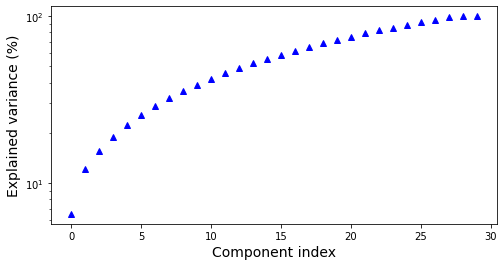

In [ ]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X)
pca = pca_scaled.named_steps['pca']

plt.figure(figsize=(8,4))
plt.semilogy(np.cumsum(pca.explained_variance_ratio_*100), 'b^')
plt.xlabel("Component index", fontsize = 14)
plt.ylabel("Explained variance (%)", fontsize = 14)
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.06527521, 0.05612313, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.01052982, 0.00140516])

### K-Means

In [ ]:
from sklearn.cluster import KMeans
#choose initial k value to be 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca_scaled)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-1.86724398e-01, -1.06430836e+00],
       [-2.75032250e-01,  1.28290958e+00],
       [ 8.63697545e+00,  3.35575621e-01],
       [ 2.67108786e+00,  1.64319869e-02],
       [ 2.57521127e+01,  8.02259567e-01]])

In [ ]:
kmeans.inertia_

228894.19612809425

In [ ]:
kmeans.score(X_pca_scaled)

-228894.19612809425

In [ ]:
def plot_data(X_pca_scaled):
    plt.plot(X_pca_scaled[:, 0], X_pca_scaled[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X_pca_scaled, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X_pca_scaled.min(axis=0) - 0.1
    maxs = X_pca_scaled.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X_pca_scaled)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("X1", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("X2", fontsize=16)
    else:
        plt.tick_params(labelleft=False)

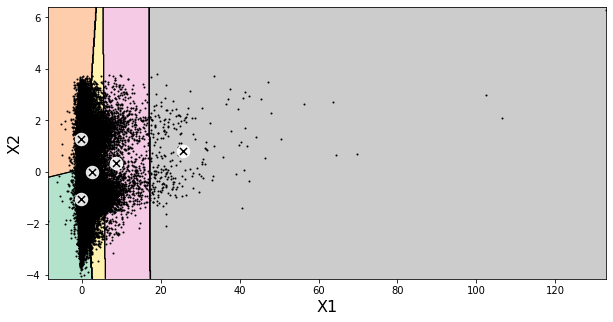

In [ ]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(kmeans, X_pca_scaled)
plt.show()

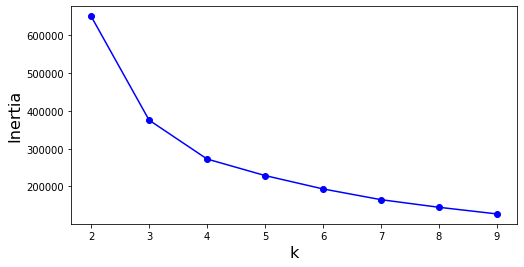

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca_scaled) for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_pca_scaled, model.labels_) for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca_scaled)
kmeans.labels_

In [ ]:
df['Clusters'] = kmeans.labels

### Conclusion:



- For the classification model, Random Forest has the higest proformance with ~90% recall and ~40% precision.
- We used grid search to obtain hyperparameters that gave optimal model performance with focus on recall.

### Limitations

- The training time for GridsearchCV is really long, which limited us in exploring more posible hyper-parameters for the models.
- We didn't know the meaning behind all the V(s) features, which limited us in understanding the characteristic of each feature as well as feature selection.


### Future Works

- Understanding the impact of each feature to the model can help us understand the model better. For future work, we would like to explore the feature importance of each model
- We could explore other methods in dealing with unbalanced date, like undersampling. 
- We could explore other machine learning models like Stochastic Gradient Descent or Support Vector Machine